[[55.1        46.1       ]
 [43.2        16.7       ]
 [30.83333333 74.66666667]
 [27.75       55.        ]]


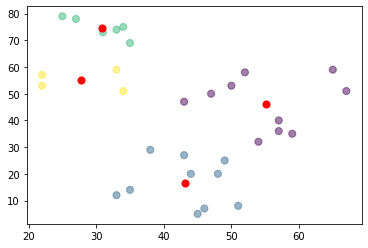

In [2]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])
  
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [4]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import xlrd
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 400, height = 300,  relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='k-Means Clustering')
label1.config(font=('helvetica', 14))
canvas1.create_window(200, 25, window=label1)

label2 = tk.Label(root, text='Type Number of Clusters:')
label2.config(font=('helvetica', 8))
canvas1.create_window(200, 120, window=label2)

entry1 = tk.Entry (root) 
canvas1.create_window(200, 140, window=entry1)

def getExcel ():
    
    global df
    import_file_path = filedialog.askopenfilename()
    read_file = pd.read_excel (import_file_path)
    df = DataFrame(read_file,columns=['x','y'])  
    
browseButtonExcel = tk.Button(text=" Import Excel File ", command=getExcel, bg='green', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 70, window=browseButtonExcel)

def getKMeans ():
    global df
    global numberOfClusters
    numberOfClusters = int(entry1.get())
    
    kmeans = KMeans(n_clusters=numberOfClusters).fit(df)
    centroids = kmeans.cluster_centers_
    
    label3 = tk.Label(root, text= centroids)
    canvas1.create_window(200, 250, window=label3)
    
    figure1 = plt.Figure(figsize=(4,3), dpi=100)
    ax1 = figure1.add_subplot(111)
    ax1.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    ax1.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    scatter1 = FigureCanvasTkAgg(figure1, root) 
    scatter1.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
    
processButton = tk.Button(text=' Process k-Means ', command=getKMeans, bg='brown', fg='white', font=('helvetica', 10, 'bold'))
canvas1.create_window(200, 170, window=processButton)

root.mainloop()